<a href="https://colab.research.google.com/github/MatDawit/Startup-Success-Predictor.github.io/blob/jackie-ver/third3featurestartuppredictormodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest Classification Model**

`Goal`: successfully predict closed (0) or still operating (1) status

In [1]:
import pandas as pd

# importing the dataset
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv('df.csv')

Saving df.csv to df.csv


In [2]:
# importing more libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
# frequency coding category_list
def frequency_encode(dataset, column_name):
    freq = dataset[column_name].value_counts()
    dataset[column_name + '_freq'] = dataset[column_name].map(freq)
    return dataset

# apply to category list
dataset = frequency_encode(dataset, 'category_list')

By frequency encoding category_list, that changes categorical data to a numeric representation of how often the category appears in the dataset.

Numeric data is easier for machine learning models to work with.

In [4]:
# selecting features (x) and the target (y)
input = ['category_list_freq', 'country_code', 'funding_rounds']
x = dataset[input].copy()
y = dataset['status']

# converting country_code to a numerical format using one hot encoding
x = pd.get_dummies(x, columns=['country_code'], prefix='country')

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

Converted country_code to one hot encoding (converting categories to new category columns, then assigning 0 or 1 to those columns) to allow for the model to be able to utilize those features to predict accurately.

Binary data is easier for machine learning models to work with.

Selecting only 3 of 10  possible features to improve user accessibility and simplify the model's display. These 3 features are also the most important, overall, this adjustment keeps the model accurate and usable.

In [5]:
# importing library to use SMOTE-ENN
from imblearn.combine import SMOTEENN

In [6]:
# implemented SMOTE-ENN
smoteenn = SMOTEENN(random_state=42)
X_train_sm, y_train_sm = smoteenn.fit_resample(X_train, y_train)

# training model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

This time to improve accuracy, I implemeneted SMOTE-ENN also known as Synthetic Minority Over-sampling Technique Edited Nearest Neighbors to try and address the imbalanced dataset to improve the prediction accuracy.

Currently, the machine learning model is extremely biased towards the majority class or 1s (still operating startups). This is causing it to provide false positives or predict a startup is still operating when it is not.

What SMOTE does is increase the amount of minority class or 0s (closed startups) to balance the dataset, therefore, making it easier on the model to predict.

The ENN or Edited Nearest Neighbors, in comparison, reduces the amount of majority class to balance the dataset. It removes data points that are hard for the model to identify. For example, a 1 who's nearest neighbors are all 0's, that might accidentally get classified as a 0.

In [7]:
# using test data to predict
modelpredict = model.predict(X_test)

In [8]:
modelpredict

array([1, 0, 1, ..., 1, 1, 1])

Classification:

`Failed (0)`: closed

`Successful (1)`: ipo, acquired, operating

In [9]:
print("Accuracy:", accuracy_score(y_test, modelpredict))
print("Confusion Matrix:\n", confusion_matrix(y_test, modelpredict))
print("Classification Report:\n", classification_report(y_test, modelpredict))

Accuracy: 0.6571499503475671
Confusion Matrix:
 [[  619   745]
 [ 6160 12616]]
Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.45      0.15      1364
           1       0.94      0.67      0.79     18776

    accuracy                           0.66     20140
   macro avg       0.52      0.56      0.47     20140
weighted avg       0.89      0.66      0.74     20140



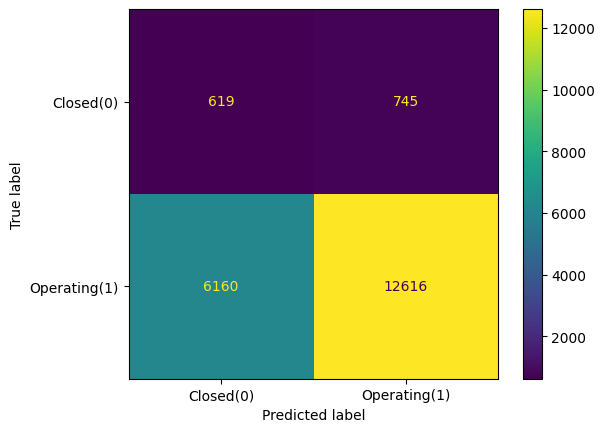

In [10]:
# visualizing accuracy
cm_visualization = ConfusionMatrixDisplay(confusion_matrix(y_test, modelpredict), display_labels=['Closed(0)', 'Operating(1)'])
cm_visualization.plot()

In [11]:
# making sure SMOTE-ENN took effect
from collections import Counter
print("Before SMOTE-ENN:", Counter(y_train))
print("After SMOTE-ENN:", Counter(y_train_sm))

Before SMOTE-ENN: Counter({1: 75100, 0: 5457})
After SMOTE-ENN: Counter({0: 34337, 1: 25917})


SMOTE-ENN still has poor accuracy but higher recall.